#Lab 2: Data Preparation - Week 04
Made using Google Colab by Ayoub Jdair (18266401)

#Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#For mounting google drive to colab sheet, this is where my files are stored and will be pulled from
from google.colab import drive
from sklearn.preprocessing import LabelEncoder

In [13]:
drive.mount('/content/MyDrive')
df = pd.read_csv('bank.csv')
old_df = df
df.head(10)

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


#Encoding Categorical Attributes to Numerical

In [14]:
# The 'default' attribute has yes and no values, 
# i will encode these into 1 & 0 respectively

scale_mapper = {
    "no": 0,
    "yes": 1 ,
    "": -1
}

df['default'] = df['default'].replace(scale_mapper)

# The 'marital' attribute has divorced, single, & married values,
# i will encode these to 0, 1, 2 respectively

scale_mapper2 = {
    "divorced": 0,
    "single": 1 ,
    "married": 2,
    "": -1
}

df['marital'] = df['marital'].replace(scale_mapper2)

# The 'education' attribute contains primary, secondary, tertiary, & NaN values,
# I will endode these to 0,1,2 & -1 respectively 
# This did not seem to work so i will try one hot encode it
# scale_mapper3 = {
#     "primary": 0,
#     "secondary": 1,
#     "tertiary": 2,
#     "NaN": -1, 
#     "": -1
# }

# df['education'] = df['education'].replace(scale_mapper3)

df['default'] = df['default'].replace(scale_mapper)

# The 'marital' attribute has divorced, single, & married values,
# i will encode these to 0, 1, 2 respectively

scale_mapper4 = {
    "no": 0,
    "yes": 1 ,
    "nan": -1,
}

df['loan'] = df['loan'].replace(scale_mapper4)

scale_mapper5 = {
    "failure": 1,
    "success": 2 ,
    "other": 0,
}

df['poutcome'] = df['poutcome'].replace(scale_mapper5)

df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,2,tertiary,0,376,no,0,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,0,secondary,0,112,no,0,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,0,primary,0,527,no,0,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,2,NaN,0,2326,yes,1,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,1,secondary,0,655,no,0,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,1,NaN,0,2785,no,0,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,1,secondary,0,127,no,0,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,2,primary,0,1154,no,0,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,2,primary,0,4343,yes,0,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,2,secondary,0,6403,no,0,cellular,22,sep,208,2,-1,0,NaN,yes


In [15]:
# one-hot encoding categorical columns with NaNs

df = pd.get_dummies(df, columns=['education', 'housing', 'contact', 'subscribed'],
                    dummy_na = True,
                    drop_first=False)
df.head(5)

,age,job,marital,default,balance,loan,day,month,duration,campaign,...,education_nan,housing_no,housing_yes,housing_nan,contact_cellular,contact_telephone,contact_nan,subscribed_no,subscribed_yes,subscribed_nan
0,32.0,technician,1,0,392,0,1,apr,957,2,...,0,0,1,0,1,0,0,1,0,0
1,39.0,technician,0,0,688,1,1,apr,233,2,...,0,0,1,0,1,0,0,1,0,0
2,59.0,retired,2,0,1035,1,1,apr,126,2,...,0,0,1,0,1,0,0,1,0,0
3,47.0,blue-collar,2,0,398,1,1,apr,274,1,...,0,0,1,0,1,0,0,1,0,0
4,54.0,retired,2,0,1004,0,1,apr,479,1,...,0,0,1,0,1,0,0,1,0,0


#Treating missing values

In [16]:
# Checking for missing values
df.isna().sum()

age                     12
job                     10
marital                  0
default                  0
balance                  0
loan                     0
day                      0
month                    0
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome               454
education_primary        0
education_secondary      0
education_tertiary       0
education_nan            0
housing_no               0
housing_yes              0
housing_nan              0
contact_cellular         0
contact_telephone        0
contact_nan              0
subscribed_no            0
subscribed_yes           0
subscribed_nan           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


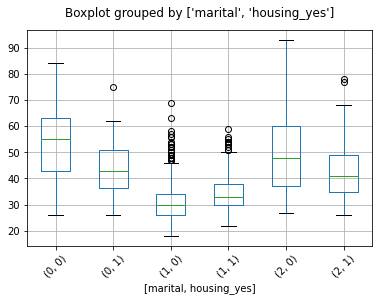

In [17]:
# The Age attribute seems to have some missing values
# I will hypothesise that the marital status and housing 
# should give a good indication of age

df.boxplot(column="age", by=["marital", "housing_yes"], rot=45)
plt.title("")
plt.show()

In [18]:
pivot_table = df.pivot_table(values = 'age',
                             index = 'marital',
                             columns = 'housing_yes',
                             aggfunc=np.median)
pivot_table

housing_yes,0,1
marital,,
0,55.0,43.0
1,30.0,33.0
2,48.0,41.0


In [19]:
df.head(10)

,age,job,marital,default,balance,loan,day,month,duration,campaign,...,education_nan,housing_no,housing_yes,housing_nan,contact_cellular,contact_telephone,contact_nan,subscribed_no,subscribed_yes,subscribed_nan
0,32.0,technician,1,0,392,0,1,apr,957,2,...,0,0,1,0,1,0,0,1,0,0
1,39.0,technician,0,0,688,1,1,apr,233,2,...,0,0,1,0,1,0,0,1,0,0
2,59.0,retired,2,0,1035,1,1,apr,126,2,...,0,0,1,0,1,0,0,1,0,0
3,47.0,blue-collar,2,0,398,1,1,apr,274,1,...,0,0,1,0,1,0,0,1,0,0
4,54.0,retired,2,0,1004,0,1,apr,479,1,...,0,0,1,0,1,0,0,1,0,0
5,46.0,self-employed,0,0,926,0,1,apr,463,1,...,0,0,1,0,1,0,0,1,0,0
6,34.0,blue-collar,2,0,1924,1,1,apr,161,2,...,0,0,1,0,1,0,0,1,0,0
7,45.0,services,0,0,396,1,1,apr,251,4,...,0,0,1,0,1,0,0,1,0,0
8,58.0,management,0,0,315,0,1,apr,121,2,...,0,0,1,0,1,0,0,1,0,0
9,49.0,management,0,0,20727,0,1,apr,285,3,...,0,1,0,0,1,0,0,1,0,0


In [20]:
# Helper function to impute missing Age values based on pivot_table values

def impute(x):
  return pivot_table.loc[x['marital'], x['housing_yes']]


# Replace missing values

df['age'].fillna(df[df['age'].isnull()].apply(impute, axis=1), inplace=True)

df.head(10)

,age,job,marital,default,balance,loan,day,month,duration,campaign,...,education_nan,housing_no,housing_yes,housing_nan,contact_cellular,contact_telephone,contact_nan,subscribed_no,subscribed_yes,subscribed_nan
0,32.0,technician,1,0,392,0,1,apr,957,2,...,0,0,1,0,1,0,0,1,0,0
1,39.0,technician,0,0,688,1,1,apr,233,2,...,0,0,1,0,1,0,0,1,0,0
2,59.0,retired,2,0,1035,1,1,apr,126,2,...,0,0,1,0,1,0,0,1,0,0
3,47.0,blue-collar,2,0,398,1,1,apr,274,1,...,0,0,1,0,1,0,0,1,0,0
4,54.0,retired,2,0,1004,0,1,apr,479,1,...,0,0,1,0,1,0,0,1,0,0
5,46.0,self-employed,0,0,926,0,1,apr,463,1,...,0,0,1,0,1,0,0,1,0,0
6,34.0,blue-collar,2,0,1924,1,1,apr,161,2,...,0,0,1,0,1,0,0,1,0,0
7,45.0,services,0,0,396,1,1,apr,251,4,...,0,0,1,0,1,0,0,1,0,0
8,58.0,management,0,0,315,0,1,apr,121,2,...,0,0,1,0,1,0,0,1,0,0
9,49.0,management,0,0,20727,0,1,apr,285,3,...,0,1,0,0,1,0,0,1,0,0


#Applying scaler

In [21]:
# We can see here that there is no need to apply scaler to any collumns 
# example: 'balance' & 'duration' -> no need for it, already on the
# appropriate scale
df.head(10)

,age,job,marital,default,balance,loan,day,month,duration,campaign,...,education_nan,housing_no,housing_yes,housing_nan,contact_cellular,contact_telephone,contact_nan,subscribed_no,subscribed_yes,subscribed_nan
0,32.0,technician,1,0,392,0,1,apr,957,2,...,0,0,1,0,1,0,0,1,0,0
1,39.0,technician,0,0,688,1,1,apr,233,2,...,0,0,1,0,1,0,0,1,0,0
2,59.0,retired,2,0,1035,1,1,apr,126,2,...,0,0,1,0,1,0,0,1,0,0
3,47.0,blue-collar,2,0,398,1,1,apr,274,1,...,0,0,1,0,1,0,0,1,0,0
4,54.0,retired,2,0,1004,0,1,apr,479,1,...,0,0,1,0,1,0,0,1,0,0
5,46.0,self-employed,0,0,926,0,1,apr,463,1,...,0,0,1,0,1,0,0,1,0,0
6,34.0,blue-collar,2,0,1924,1,1,apr,161,2,...,0,0,1,0,1,0,0,1,0,0
7,45.0,services,0,0,396,1,1,apr,251,4,...,0,0,1,0,1,0,0,1,0,0
8,58.0,management,0,0,315,0,1,apr,121,2,...,0,0,1,0,1,0,0,1,0,0
9,49.0,management,0,0,20727,0,1,apr,285,3,...,0,1,0,0,1,0,0,1,0,0


#Treating outliers

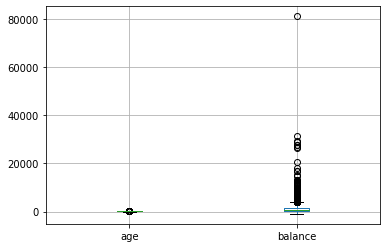

In [22]:
# Looking for outliers

df.boxplot(column=['age', 'balance'])
plt.show()

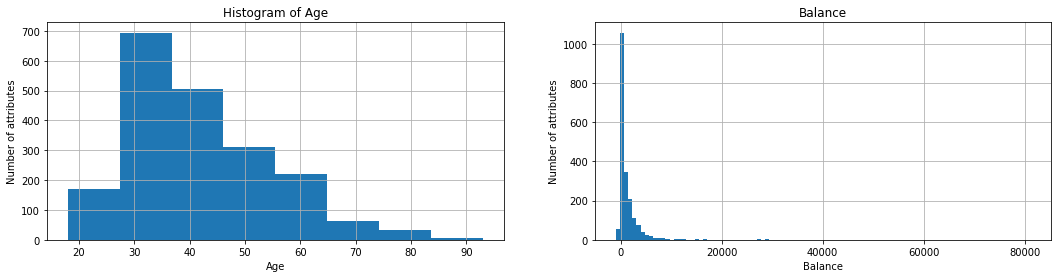

In [23]:
fig = plt.figure(figsize=(18,4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Age")
ax1.set_xlabel("Age")
ax1.set_ylabel("Number of attributes")
df['age'].hist(bins=8)


ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Balance")
ax3.set_xlabel("Balance")
ax3.set_ylabel("Number of attributes")

df['balance'].hist(bins=100)

plt.show()

# Both are left-skewed

In [24]:
# Min vals

df[['age', 'balance']].min()

age         18.0
balance   -980.0
dtype: float64

In [25]:
# using log transofrmation to decrease outliers
# df['age'] = np.log(df['age']+2.26)
df['balance'] = np.log(df['balance']+2.87)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


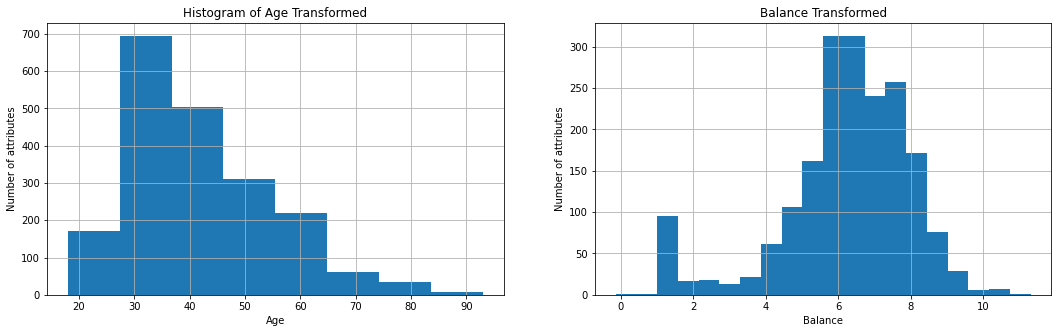

In [26]:
fig = plt.figure(figsize=(18,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Age Transformed")
ax1.set_xlabel("Age")
ax1.set_ylabel("Number of attributes")
df['age'].hist(bins=8)


ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Balance Transformed")
ax3.set_xlabel("Balance")
ax3.set_ylabel("Number of attributes")

df['balance'].hist(bins=20)

plt.show()

# Features are now less skewed to the left

In [27]:
x = df['balance'].value_counts()
y = df['balance'].count()
print((x/y)*100)

1.054312    4.504976
1.353255    0.471451
5.616298    0.419068
5.723160    0.366684
6.489007    0.314301
              ...   
8.050343    0.052383
6.915594    0.052383
7.127589    0.052383
4.802955    0.052383
8.764970    0.052383
Name: balance, Length: 1188, dtype: float64


In [28]:
# It looks like duration has an even distrobution
# no need to apply min-max scaler
df['duration'].value_counts()

200     12
90      11
219     11
187     10
263     10
        ..
1363     1
343      1
1226     1
373      1
1334     1
Name: duration, Length: 655, dtype: int64

#Creating new feature using existing features

In [29]:
df.head(1)

,age,job,marital,default,balance,loan,day,month,duration,campaign,...,education_nan,housing_no,housing_yes,housing_nan,contact_cellular,contact_telephone,contact_nan,subscribed_no,subscribed_yes,subscribed_nan
0,32.0,technician,1,0,5.978557,0,1,apr,957,2,...,0,0,1,0,1,0,0,1,0,0


In [30]:
df['poutcome'].value_counts()

1.0    955
2.0    444
0.0    147
Name: poutcome, dtype: int64

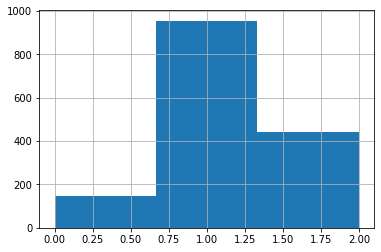

In [31]:
df['poutcome'].hist(bins=3)
plt.show()

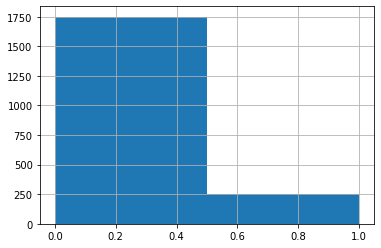

In [32]:
df['loan'].hist(bins=2)
plt.show()

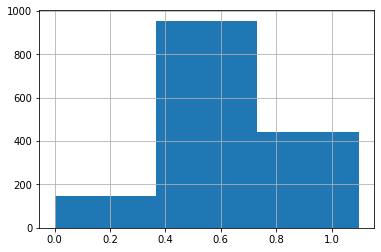

In [33]:
np.log(df['poutcome']+1).hist(bins=3)
plt.show()

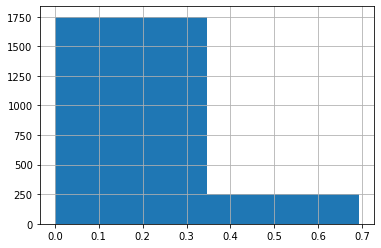

In [34]:
np.log(df['loan']+1).hist(bins=2)
plt.show()

In [35]:
# Creating new feature 'outcome' using 'Loan' + 'POutcome'
df['outcome'] = old_df['loan'] + old_df['poutcome']
df.head(3)

,age,job,marital,default,balance,loan,day,month,duration,campaign,...,housing_no,housing_yes,housing_nan,contact_cellular,contact_telephone,contact_nan,subscribed_no,subscribed_yes,subscribed_nan,outcome
0,32.0,technician,1,0,5.978557,0,1,apr,957,2,...,0,1,0,1,0,0,1,0,0,1.0
1,39.0,technician,0,0,6.537952,1,1,apr,233,2,...,0,1,0,1,0,0,1,0,0,2.0
2,59.0,retired,2,0,6.944926,1,1,apr,126,2,...,0,1,0,1,0,0,1,0,0,2.0


In [36]:
df[['outcome']].min()

outcome    0.0
dtype: float64

In [37]:
df[['outcome']].max()

outcome    3.0
dtype: float64

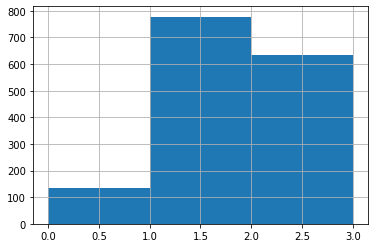

In [38]:
df['outcome'].hist(bins=3)
plt.show()

In [39]:
df.drop('poutcome', axis=1, inplace=True)

#Saving Prepared_Bank.csv

In [43]:
df.to_csv('Prepared_Bank.csv')

In [44]:
from google.colab import files

path = '/content/MyDrive'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

IsADirectoryError: ignored

In [ ]:
files.download('Prepared_Bank.csv')